In [21]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [22]:
df = pd.read_excel(r"/content/performance.xlsx", sheet_name='train_performance')
df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,300000000,345000000.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,150000000,172500000.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,200000000,222500000.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,100000000,115000000.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,400000000,440000000.0,30,NaN,Good


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5818 entries, 0 to 5817
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     5818 non-null   object 
 1   systemloanid   5818 non-null   int64  
 2   loannumber     5818 non-null   int64  
 3   approveddate   4965 non-null   object 
 4   creationdate   4959 non-null   object 
 5   loanamount     5818 non-null   int64  
 6   totaldue       5818 non-null   float64
 7   termdays       5818 non-null   int64  
 8   referredby     771 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 454.7+ KB


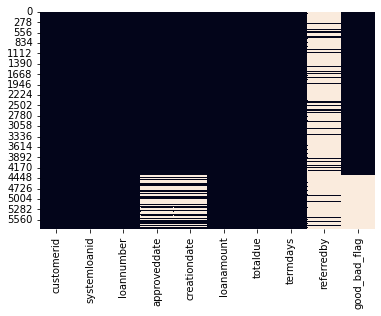

In [23]:
import seaborn as sns
df.isnull()
df.info(verbose=True,null_counts=True)
sns.heatmap(df.isnull(), cbar=False)

In [24]:
df.drop(['referredby', 'good_bad_flag', 'approveddate', 'creationdate','systemloanid','loannumber'], axis=1, inplace = True)
df

,customerid,loanamount,totaldue,termdays
0,8a2a81a74ce8c05d014cfb32a0da1049,300000000,345000000.0,30
1,8a85886e54beabf90154c0a29ae757c0,150000000,172500000.0,30
2,8a8588f35438fe12015444567666018e,200000000,222500000.0,15
3,8a85890754145ace015429211b513e16,100000000,115000000.0,15
4,8a858970548359cc0154883481981866,400000000,440000000.0,30
...,...,...,...,...
5813,8a858fb45bb59c21015bb88a191f58f2,10000,11500.0,15
5814,8a858fcb5b00cc54015b0253ced26a5f,10000,13000.0,30
5815,8a858fde56eb02280156f59b976d46c0,40000,48000.0,60
5816,8a858e10570f2d65015717fcfec44996,60000,68100.0,90


# Nueva sección

In [25]:
df['totalamountreturn'] = df['totaldue'] - df['loanamount']
df['interestrate'] =( df['totaldue'] - df['loanamount'] ) / df['totaldue'] * 100
df

,customerid,loanamount,totaldue,termdays,totalamountreturn,interestrate
0,8a2a81a74ce8c05d014cfb32a0da1049,300000000,345000000.0,30,45000000.0,13.043478
1,8a85886e54beabf90154c0a29ae757c0,150000000,172500000.0,30,22500000.0,13.043478
2,8a8588f35438fe12015444567666018e,200000000,222500000.0,15,22500000.0,10.112360
3,8a85890754145ace015429211b513e16,100000000,115000000.0,15,15000000.0,13.043478
4,8a858970548359cc0154883481981866,400000000,440000000.0,30,40000000.0,9.090909
...,...,...,...,...,...,...
5813,8a858fb45bb59c21015bb88a191f58f2,10000,11500.0,15,1500.0,13.043478
5814,8a858fcb5b00cc54015b0253ced26a5f,10000,13000.0,30,3000.0,23.076923
5815,8a858fde56eb02280156f59b976d46c0,40000,48000.0,60,8000.0,16.666667
5816,8a858e10570f2d65015717fcfec44996,60000,68100.0,90,8100.0,11.894273


In [ ]:
#from datetime import datetime

#df['approveddate'] = pd.to_datetime(df['approveddate'])
#df['creationdate'] = pd.to_datetime(df['creationdate'])
#df['datediff'] = (df['approveddate'] - df['creationdate'])

#df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,datediff
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,300000000,345000000.0,30,0 days 01:00:09
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,150000000,172500000.0,30,0 days 01:00:23
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,200000000,222500000.0,15,0 days 01:00:06
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,100000000,115000000.0,15,0 days 01:00:06
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,400000000,440000000.0,30,0 days 01:00:06


In [ ]:
#df['datediffminutes'] = df['datediff'].astype('timedelta64[m]').astype(np.int32) 
#df.head()

IntCastingNaNError: ignored

In [ ]:

#df['Time2'] = df['datediff'].apply(lambda x: sum([a*b for a,b in zip(list(map(int,x.split(':')))[::-1],[1/60,1,60])]))
#df.dtypes

AttributeError: ignored

In [27]:
df.to_csv('performancelimpio.csv',index=False)